# 01C Data Visualizations

## Imports

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

## Read Data

In [91]:
df = pd.read_csv('../west_nile/west_nile/input/train.csv')
spray_df = pd.read_csv('../west_nile/west_nile/input/spray.csv')

## Proportion of Data by Mosquitos Species

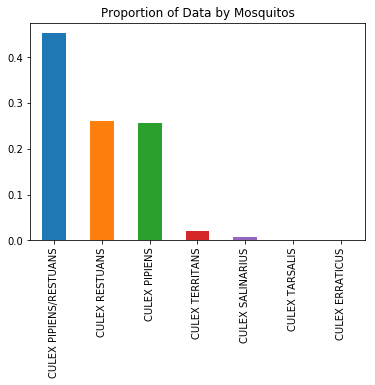

In [92]:
plt.title('Proportion of Data by Mosquitos')
df.Species.value_counts(normalize=True).plot(kind='bar');

## Incidence of West Nile Virus by Mosquito Species

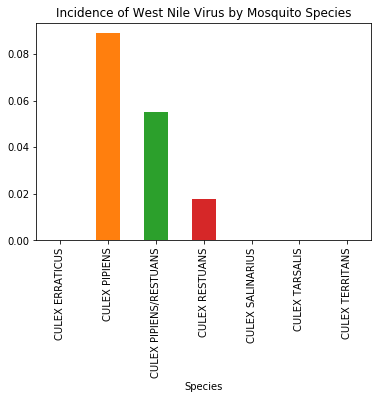

In [93]:
plt.title('Incidence of West Nile Virus by Mosquito Species')
df.groupby('Species')['WnvPresent'].mean().plot(kind='bar');

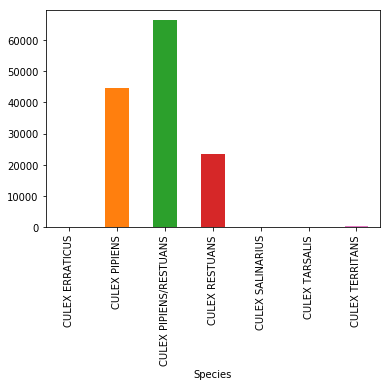

In [94]:
df.groupby('Species')['NumMosquitos'].sum().plot(kind='bar');

In [95]:
df.groupby('Species')['NumMosquitos'].sum()

Species
CULEX ERRATICUS               7
CULEX PIPIENS             44671
CULEX PIPIENS/RESTUANS    66268
CULEX RESTUANS            23431
CULEX SALINARIUS            145
CULEX TARSALIS                7
CULEX TERRITANS             510
Name: NumMosquitos, dtype: int64

In [96]:
cols = [col for col in df.columns if col not in ['NumMosquitos', 'WnvPresent']]
df = df.groupby(cols, as_index=False).sum()
df['WnvPresent'] = (df.WnvPresent>0).astype(int)

In [97]:

# mapdata = np.loadtxt("../west_nile/west_nile/input/mapdata_copyright_openstreetmap_contributors.txt")
# traps = df[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

# aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
# lon_lat_box = (-88, -87.5, 41.6, 42.1)

# plt.figure(figsize=(10,14))
# plt.imshow(mapdata,
#           cmap=plt.get_cmap('gray'),
#           extent=lon_lat_box,
#           aspect=aspect)

# spray_df = spray_df[spray_df['Longitude']>-88]
# locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
# sprays = spray_df[['Longitude', 'Latitude']].drop_duplicates().values
# plt.scatter(sprays[:,0], sprays[:,1], c='r', alpha=1)
# plt.scatter(locations[:,0], locations[:,1], marker='x')


In [98]:
# dfll = df.groupby(['Latitude', 'Longitude'],as_index=False).mean().copy()
# traps = df[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

# aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
# lon_lat_box = (-88, -87.5, 41.6, 42.1)

# plt.figure(figsize=(10,14))
# plt.imshow(mapdata,
#           cmap=plt.get_cmap('gray'),
#           extent=lon_lat_box,
#           aspect=aspect)

# locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
# #plt.scatter(locations[:,0], locations[:,1], marker='x')
# plt.scatter(dfll['Longitude'], dfll['Latitude'], c=dfll.WnvPresent, s=5*dfll.NumMosquitos, 
#             marker='o',alpha=0.5, cmap='hot')
# plt.colorbar(fraction=0.05)
# plt.title('Probability of WNV by num of mosquitos')

## Correlation between number of mosquitos and probability of WNV

In [99]:
df.NumMosquitos.value_counts().index.sort_values(ascending=False)

Int64Index([2532, 2356, 2207, 1658, 1648, 1554, 1543, 1520, 1310, 1054,
            ...
              10,    9,    8,    7,    6,    5,    4,    3,    2,    1],
           dtype='int64', length=232)

In [100]:
df.corr()['NumMosquitos']

Block             -0.075044
Latitude          -0.058984
Longitude         -0.001723
AddressAccuracy   -0.092286
NumMosquitos       1.000000
WnvPresent         0.233532
Name: NumMosquitos, dtype: float64

In [101]:
df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,1,0
3,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0
4,2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,1,0


In [102]:
df['Month'] = df.Date.str[5:7]
df = pd.get_dummies(df, columns=['Month', 'Species'])

In [103]:
with open('../Cleansed_Data/weather_df_comp.pkl', 'rb') as f:
    weather_df_comp = pickle.load(f)

In [104]:
df = df.join(weather_df_comp, on='Date')

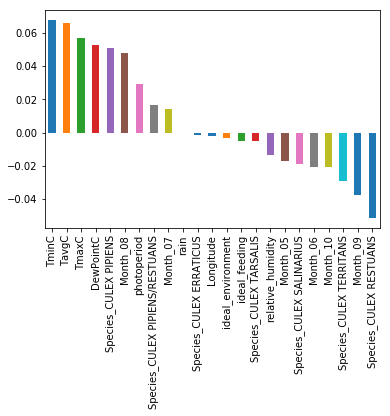

In [117]:
df.drop(['WnvPresent', 'AddressAccuracy','Block', 'Latitude'], 
        axis=1).corr()['NumMosquitos'].sort_values(ascending=False)[1:].plot(kind='bar')

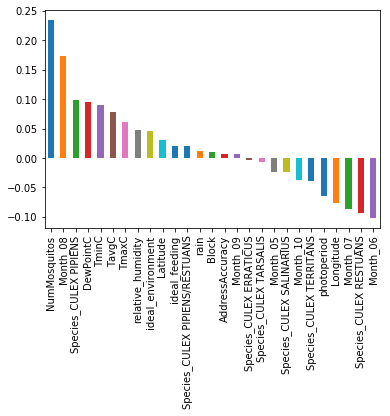

In [105]:
df.corr()['WnvPresent'].sort_values(ascending=False)[1:].plot(kind='bar')

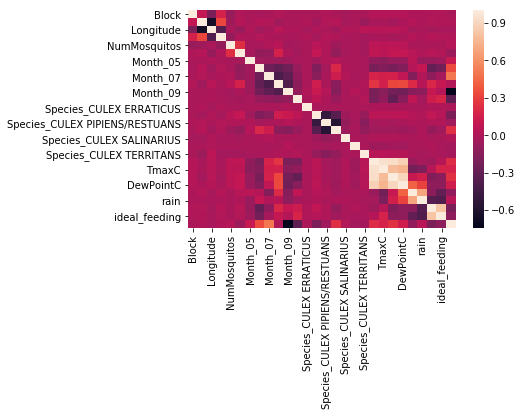

In [106]:
sns.heatmap(df.corr())

### 